In [1]:
from astropy.io import fits
import os
import pandas as pd
import numpy as np

In [2]:
path = 'files'
os.listdir(path)

['ALASKA_20120103_184500_59.fit.gz',
 'ALASKA_20120103_190000_59.fit.gz',
 'ALASKA_20120103_191500_59.fit.gz',
 'ALASKA_20120103_193000_59.fit.gz',
 'ALASKA_20120103_194500_59.fit.gz',
 'ALASKA_20120103_200000_59.fit.gz',
 'ALASKA_20120103_201500_59.fit.gz',
 'ALASKA_20120103_203000_59.fit.gz',
 'ALASKA_20120103_204500_59.fit.gz',
 'ALASKA_20120103_210000_59.fit.gz',
 'ALASKA_20120103_211500_59.fit.gz',
 'ALASKA_20120103_213000_59.fit.gz',
 'ALASKA_20120103_214500_59.fit.gz',
 'ALASKA_20120103_220000_59.fit.gz',
 'ALASKA_20120103_221500_59.fit.gz',
 'ALASKA_20120103_223000_59.fit.gz',
 'ALASKA_20120103_224500_59.fit.gz',
 'ALASKA_20120103_230000_59.fit.gz',
 'ALASKA_20120103_231500_59.fit.gz',
 'ALASKA_20120103_233000_59.fit.gz',
 'ALASKA_20120103_234500_59.fit.gz',
 'ALASKA_20120104_000000_59.fit.gz',
 'ALASKA_20120104_001500_59.fit.gz',
 'ALASKA_20120104_003000_59.fit.gz',
 'ALASKA_20120104_004500_59.fit.gz',
 'ALASKA_20120104_010000_59.fit.gz',
 'ALASKA_20120104_184500_59.fit.gz',
 

In [3]:
len(os.listdir(path))

11373

In [4]:
f ='BIR_20120101_185959_03.fit.gz'
f.split('_')[2][:2]+':'+f.split('_')[2][2:4]+':'+f.split('_')[2][4:6]

'18:59:59'

In [5]:
f.index('.')

22

In [6]:
f[:f.index('.')]

'BIR_20120101_185959_03'

In [7]:
ts = ['18:59:59','20:00:00']
ss = ['bir','bir']

t = '18:59:59' 
s= 'bir'

In [8]:
if t in ts and s not in ss[ts.index(t)]:
    print('t')
else: print('f')

f


In [9]:
ss[ts.index(t)] +=  ', '+str(s)
ss[ts.index(t)]
ss

['bir, bir', 'bir']

In [10]:
stations =[]
dates = []
time =[]
name=[]

for file in os.listdir(path):

        stations.append(file.split('_')[0])
        dates.append(file.split('_')[1])
        time.append(file.split('_')[2])
        name.append(file)

In [11]:
print(stations)
print(dates)
print(time)
print(name)

['ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA', 'ALASKA',

In [12]:
for f in range(len(time)):
    time[f]=time[f][:2]+':'+time[f][2:4]+':'+time[f][4:6]


In [13]:
print(len(stations))
print(len(dates))
print(len(time))
print(len(name))

11373
11373
11373
11373


In [14]:
df = pd.DataFrame(columns=['Type'])
df

,Type


In [17]:
df ['date'] = np.array(dates)
df ['stations'] = np.array(stations)
df ['start time'] = np.array(time)
df['name'] = np.array(name)

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['stations'] = df['stations'].apply(lambda x: x.split(', '))
df['start time'] = pd.to_datetime(df['start time'], format='%H:%M:%S').dt.time
df['name'] = df['name'].astype('str')
df.head()



,Type,date,stations,start time,name
0,NaN,2012-01-03,[ALASKA],18:45:00,ALASKA_20120103_184500_59.fit.gz
1,NaN,2012-01-03,[ALASKA],19:00:00,ALASKA_20120103_190000_59.fit.gz
2,NaN,2012-01-03,[ALASKA],19:15:00,ALASKA_20120103_191500_59.fit.gz
3,NaN,2012-01-03,[ALASKA],19:30:00,ALASKA_20120103_193000_59.fit.gz
4,NaN,2012-01-03,[ALASKA],19:45:00,ALASKA_20120103_194500_59.fit.gz


In [18]:
df.shape

(11373, 5)

In [19]:
import pandas as pd

# Assuming 'start time' is in datetime format, if not convert it first
df['start time'] = pd.to_datetime(df['start time'], format='%H:%M:%S')

# Sort by date and time to make sure they are consecutive
df = df.sort_values(by=['date', 'start time']).reset_index(drop=True)

to_drop = []  # List to keep track of rows to drop
for i in range(1, len(df)):
    current_time = df.loc[i, 'start time']
    previous_time = df.loc[i - 1, 'start time']
    current_date = df.loc[i, 'date']
    previous_date = df.loc[i - 1, 'date']
    
    # Check if the current and previous time are in the same minute AND have the same date
    if current_date == previous_date and current_time.floor('T') == previous_time.floor('T'):
        # Merge stations (assuming they are lists)
        df.at[i, 'stations'] = df.at[i - 1, 'stations'] + df.at[i, 'stations']
        to_drop.append(i - 1)  # Mark the previous row for deletion

    # Check if the time difference is within 90 seconds AND the date is the same
    elif current_date == previous_date and (current_time - previous_time).seconds in range(3*60):
        # Merge stations (assuming they are lists)
        df.at[i, 'stations'] = df.at[i - 1, 'stations'] + df.at[i, 'stations']
        to_drop.append(i - 1)  # Mark the previous row for deletion

# Drop the rows we marked for deletion
dropped = df.iloc[to_drop].shape[0]
df = df.drop(to_drop).reset_index(drop=True)

# Convert 'start time' back to string if needed
df['start time'] = df['start time'].dt.strftime('%H:%M:%S')

df


C:\Users\HP\AppData\Local\Temp\ipykernel_17368\3195603308.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  if current_date == previous_date and current_time.floor('T') == previous_time.floor('T'):


,Type,date,stations,start time,name
0,NaN,2012-01-01,"[KASI, RCAG]",01:00:00,RCAG_20120101_010000_59.fit.gz
1,NaN,2012-01-01,[KASI],01:15:00,KASI_20120101_011500_59.fit.gz
2,NaN,2012-01-01,"[RCAG, KASI]",03:45:00,KASI_20120101_034500_59.fit.gz
3,NaN,2012-01-01,[KASI],04:30:00,KASI_20120101_043000_59.fit.gz
4,NaN,2012-01-01,"[KASI, RCAG]",04:45:00,RCAG_20120101_044500_59.fit.gz
...,...,...,...,...,...
2586,NaN,2012-01-21,"[ALASKA, UNAM]",22:45:06,UNAM_20120121_224506_59.fit.gz
2587,NaN,2012-01-21,[ALASKA],23:00:00,ALASKA_20120121_230000_59.fit.gz
2588,NaN,2012-01-21,[ALASKA],23:15:00,ALASKA_20120121_231500_59.fit.gz
2589,NaN,2012-01-21,[ALASKA],23:30:00,ALASKA_20120121_233000_59.fit.gz


In [20]:
print(f'Dropped:\n {dropped}')

Dropped:
 8782


In [21]:
df[df['date'] == '2012-01-01'].head(20)

,Type,date,stations,start time,name
0,NaN,2012-01-01,"[KASI, RCAG]",01:00:00,RCAG_20120101_010000_59.fit.gz
1,NaN,2012-01-01,[KASI],01:15:00,KASI_20120101_011500_59.fit.gz
2,NaN,2012-01-01,"[RCAG, KASI]",03:45:00,KASI_20120101_034500_59.fit.gz
3,NaN,2012-01-01,[KASI],04:30:00,KASI_20120101_043000_59.fit.gz
4,NaN,2012-01-01,"[KASI, RCAG]",04:45:00,RCAG_20120101_044500_59.fit.gz
5,NaN,2012-01-01,[KRIM],05:02:52,KRIM_20120101_050252_00.fit.gz
6,NaN,2012-01-01,"[BIR, BIR, BIR, RCAG, KRIM]",05:17:52,KRIM_20120101_051752_00.fit.gz
7,NaN,2012-01-01,[KRIM],05:32:52,KRIM_20120101_053252_00.fit.gz
8,NaN,2012-01-01,[KRIM],05:47:52,KRIM_20120101_054752_00.fit.gz
9,NaN,2012-01-01,[KRIM],06:02:52,KRIM_20120101_060252_00.fit.gz


In [341]:
from tqdm import tqdm

In [342]:
import read_Data
import cv2

In [343]:
images = []
times = []
freqs = []
names=[]
first_image_shape = None  # Variable to hold the shape of the first image

for file in tqdm(list(df['name'])):
    try:
        if file.endswith("gz"):  # Ensuring we're reading only the .gz files
            img, freq, time = read_Data.read_fits(os.path.join('files', file))

            if img is not None:
                if first_image_shape is None:  # Set the shape of the first image
                    first_image_shape = img.shape

                # Resize all subsequent images to match the first image's shape
                img_resized = cv2.resize(img, (first_image_shape[1], first_image_shape[0]))

                images.append(img_resized)
                freqs.append(freq)
                times.append(time)
                names.append(file)
    except Exception as e:
        print(f"Warning: Error reading FITS file '{file}': {e}")
        # Optionally skip this file or handle the error differently

info = pd.DataFrame({'freqs': freqs, 'times': times,'name':names})

100%|██████████| 2591/2591 [00:54<00:00, 47.80it/s]


In [344]:
len(os.listdir('files'))

11373

In [345]:
df.shape[0]

2591

In [346]:
np.shape(images)

(2591, 200, 3600)

In [347]:
info

,freqs,times,name
0,"[440.0, 436.875, 436.81298828125, 435.625, 434...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",RCAG_20120101_010000_59.fit.gz
1,"[448.31298828125, 445.81298828125, 445.5, 442....","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",KASI_20120101_011500_59.fit.gz
2,"[448.31298828125, 445.81298828125, 445.5, 442....","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",KASI_20120101_034500_59.fit.gz
3,"[448.31298828125, 445.81298828125, 445.5, 442....","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",KASI_20120101_043000_59.fit.gz
4,"[440.0, 436.875, 436.81298828125, 435.625, 434...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",RCAG_20120101_044500_59.fit.gz
...,...,...,...
2586,"[449.988, 446.175, 444.8, 443.363, 441.988, 44...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",UNAM_20120121_224506_59.fit.gz
2587,"[842.81298828125, 840.18798828125, 837.75, 835...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",ALASKA_20120121_230000_59.fit.gz
2588,"[842.81298828125, 840.18798828125, 837.75, 835...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",ALASKA_20120121_231500_59.fit.gz
2589,"[842.81298828125, 840.18798828125, 837.75, 835...","[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2...",ALASKA_20120121_233000_59.fit.gz


## Plot 

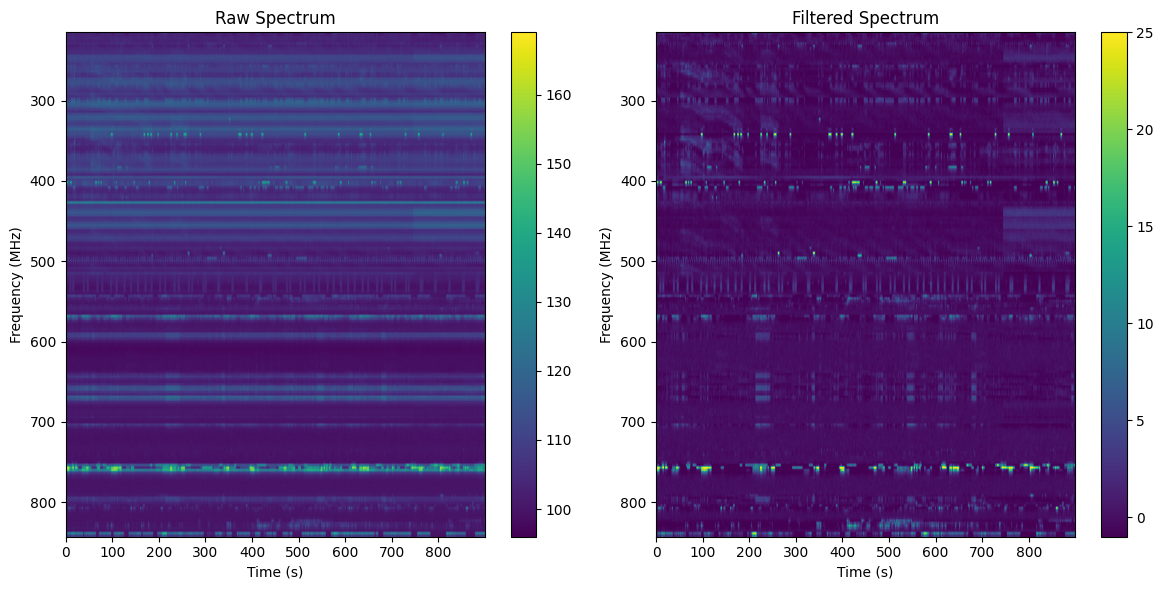

2329 ALASKA_20120120_000000_59.fit.gz


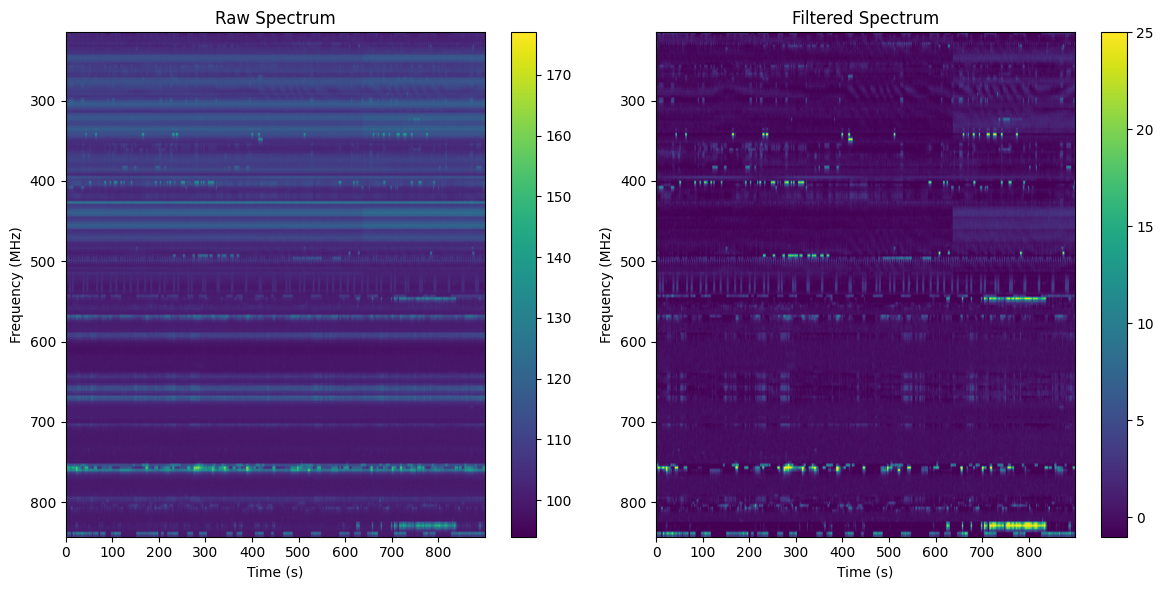

2330 ALASKA_20120120_001500_59.fit.gz


In [351]:
for i in range(2328,2330):
    read_Data.plot_fits_data(images[i],info['freqs'][i],info['times'][i])
    print(i+1,info['name'][i])

## Checkpoint 1

In [352]:
Type =['Clear','Background noise','Background noise','Background noise','Clear',                          #5
       'Background noise','Type 2','Type 2','Type 2','Background noise'                                  #10
       ,'Background noise','Type 3','Background noise','Background noise','Background noise',            #15
       'Type 3','Background noise','Background noise','Type 3','Background noise'                        #20
       ,'Background noise','Clear','Background noise','Clear','Background noise'                         #25
       ,'Clear','Background noise','Background noise','Type 3','Type 3'                                  #30
       ,'Clear','Type 2','Background noise','Background noise','Background noise'                        #35
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #40
       ,'Background noise','Background noise','Background noise','Background noise','Background noise',  #45
       'Background noise','Background noise','Background noise','Background noise','Background noise',   #50
       'Background noise','Background noise','Background noise','Background noise','Background noise',   #55
       'Background noise','Background noise','Background noise','Background noise','Background noise'    #60
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #65
       ,'Background noise','Clear','Clear','Type 2','Background noise'                                   #70
       ,'Type 2','Clear','Type 2','Type 2','Type 2'                                                      #75
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #80
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #85
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #90
       ,'Clear','Background noise','Clear','Background noise','Clear'                                    #95
       ,'Background noise','Type 3','Background noise','Type 3','Clear'                                  #100
       ,'Background noise','Type 3','Type 3','Background noise','Clear'                                  #105
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #110
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #115
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #120
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #125
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #130
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #135
       ,'Clear','Clear','Clear','Clear','Clear'                                                          #140
       ,'Background noise','Background noise','Clear','Clear','Clear'                                    #145
       ,'Clear','Clear','Clear','Type 2','Type 2'                                                        #150
       ,'Type 2','Type 2','Type 2','Background noise','Background noise'                                 #155
       ,'Background noise','Background noise','Background noise','Background noise','Type 3'             #160
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #165
       ,'Background noise','Background noise','Type 3','Background noise','Background noise'             #170
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #175
       ,'Clear','Background noise','Clear','Background noise','Background noise'                         #180
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #185
       ,'Background noise','Background noise','Background noise','Clear','Background noise'              #190
       ,'Type 3','Background noise','Background noise','Background noise','Background noise'              #195
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #200
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #205
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #210
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #215
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #220
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #225
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #230
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #235
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #240
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #245
       ,'Type 3' ,'Background noise','Clear','Type 3','Clear'                                            #250
       ,'Background noise','Background noise','Clear','Clear','Background noise'                         #255
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #260
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #265
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #270
       ,'Background noise','Type 2','Background noise','Background noise','Type 2'                       #275
       ,'Clear','Background noise','Type 2','Clear','Background noise'                                   #280
       ,'Type 2','Clear','Background noise','Clear','Clear'                                              #285
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #290
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #295
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #300
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #305
       ,'Background noise','Background noise','Type 3','Background noise','Background noise'             #310
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #315
       ,'Background noise','Background noise','Type 3','Background noise','Background noise'             #320
       ,'Background noise','Type 3','Background noise','Background noise','Background noise'             #325
       ,'Background noise','Background noise','Background noise','Background noise','Type 3'             #330
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #335
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #340
       ,'Background noise','Type 2','Background noise','Background noise','Background noise'             #345
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #350
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #355
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #360
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #365
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #370
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #375
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #380
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #385
       ,'Type 3','Type 3','Type 3','Type 3','Type 3'                                                     #390
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #395
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #400
       ,'Background noise','Background noise','Type 2','Background noise','Background noise'             #405
       ,'Background noise','Background noise','Type 2','Background noise','Background noise'             #410
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #415
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #420
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #425
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #430
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #435
       ,'Type 3','Background noise','Background noise','Background noise','Background noise'             #440
       ,'Background noise','Type 3','Background noise','Background noise','Background noise'             #445
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #450
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #455
       ,'Background noise','Background noise','Background noise','Type 2','Background noise'             #460
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #465
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #470
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #475
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #480
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #485
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #490
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #495
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #500
       ,'Type 3','Background noise','Clear','Background noise','Background noise'                        #505
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #510
       ,'Clear','Background noise','Type 3','Background noise','Type 3'                                  #515
       ,'Background noise','Clear','Background noise','Clear','Background noise'                         #520
       ,'Type 3','Clear','Type 3','Clear','Clear'                                                        #525
       ,'Background noise','Background noise','Background noise','Background noise','Type 2'             #530
       ,'Background noise','Background noise','Type 2','Background noise','Background noise'             #535
       ,'Type 2','Background noise','Background noise','Type 2','Background noise'                       #540
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #545
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #550
       ,'Type 3','Background noise','Type 3','Background noise','Clear'                                  #555
       ,'Background noise','Type 3','Background noise','Background noise','Background noise'             #560
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #565
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #570
       ,'Type 3','Type 3', 'Background noise','Background noise','Background noise'                      #575
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #580
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #585
       ,'Type 2','Background noise','Background noise','Background noise','Background noise'             #590
       ,'Background noise','Background noise','Background noise','Type 3','Type 3'                       #595
       ,'Type 3','Type 3','Type 3','Type 3','Type 3'                                                     #600
       ,'Type 3','Type 3','Type 3','Type 3','Background noise'                                           #605
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #610
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #615
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #620
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #625
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #630
       ,'Type 3','Background noise','Type 3','Type 3','Background noise'                                 #635
       ,'Background noise','Background noise','Background noise','Clear','Background noise'              #640
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #645
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #650
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #655
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #660
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #665
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #670
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #675
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #680
       ,'Background noise','Clear','Background noise','Clear','Background noise'                         #685
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #690
       ,'Clear','Background noise','Clear','Background noise','Background noise'                         #695
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #700
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #705
       ,'Type 2','Type 2','Background noise','Background noise','Background noise'                       #710
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #715
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #720
       ,'Background noise','Background noise','Type 3','Type 3','Type 3'                                 #725
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #730
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #735
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #740
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #745
       ,'Background noise','Type 3','Type 3','Background noise','Clear'                                  #750
       ,'Background noise','Background noise','Background noise','Background noise','Type 3'             #755
       ,'Type 3','Background noise','Type 3','Background noise','Background noise'                       #760
       ,'Type 3','Background noise','Background noise','Clear','Background noise'                        #765
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #770
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #775
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #780
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #785
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #790
       ,'Background noise','Background noise','Clear','Background noise','Type 2'                        #795
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #800
       ,'Clear','Background noise','Background noise','Background noise','Clear'                         #805
       ,'Background noise','Type 3','Background noise','Background noise','Background noise'             #810
       ,'Background noise','Background noise','Type 2','Background noise','Clear'                        #815
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #820
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #825
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #830
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #835
       ,'Type 2','Background noise','Background noise','Background noise','Background noise'             #840
       ,'Background noise','Background noise','Type 3','Background noise','Background noise'             #845
       ,'Background noise','Background noise','Background noise','Background noise','Type 3'             #850
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #855
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #860
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #865
       ,'Background noise','Background noise','Background noise','Clear','Clear'                         #870
       ,'Clear','Clear','Clear','Type 3','Clear'                                                         #875
       ,'Type 3','Background noise','Type 3','Clear','Type 3'                                            #880
       ,'Clear','Clear','Clear','Type 3','Clear'                                                         #885
       ,'Type 3','Clear','Type 3','Clear','Type 3'                                                       #890
       ,'Background noise','Type 3','Background noise','Type 3','Background noise'                       #895
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #900
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #905
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #910
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #915
       ,'Background noise','Type 3','Background noise','Background noise','Background noise'             #920
       ,'Clear','Background noise','Type 2','Background noise','Background noise'                        #925
       ,'Background noise','Background noise','Background noise','Clear','Background noise'              #930
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #935
       ,'Background noise','Background noise','Background noise','Clear','Background noise'              #940
       ,'Background noise','Background noise','Clear','Background noise','Background noise'              #945
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #950
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #955
       ,'Background noise','Background noise','Background noise','Type 2','Background noise'             #960
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #965
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #970
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #975
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #980
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #985
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #990
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #995
       ,'Background noise','Background noise','Background noise','Background noise','Type 3'             #1000
       ,'Type 3','Clear','Type 3','Background noise','Type 3'                                            #1005
       ,'Background noise','Type 3','Type 3','Background noise','Type 3'                                 #1010
       ,'Clear','Background noise','Type 3','Type 3','Type 3'                                            #1015
       ,'Background noise','Type 3','Type 3','Background noise','Background noise'                       #1020
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1025    
       ,'Clear','Background noise','Clear','Background noise','Clear'                                    #1030
       ,'Background noise','Clear','Background noise','Clear','Background noise'                         #1035
       ,'Clear','Background noise','Type 3','Background noise','Background noise'                        #1040
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1045
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1050
       ,'Background noise','Type 3','Type 3','Background noise','Background noise'                       #1055
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1060
       ,'Type 3','Background noise','Background noise','Background noise','Background noise'             #1065
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1070
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1075
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1080
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1085
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1090
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1095
       ,'Background noise','Type 2','Type 2','Background noise','Background noise'                       #1100
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1105
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1110
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1115
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1120
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1125
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1130
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1135
       ,'Background noise','Background noise','Type 3','Type 3','Type 3'                                 #1140
       ,'Type 3','Background noise','Type 3','Background noise','Type 3'                                 #1145
       ,'Background noise','Type 3','Background noise','Type 3','Background noise'                       #1150
       ,'Type 3','Background noise','Background noise','Background noise','Background noise'             #1155          
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1160
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1165
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1170
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1175
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1180
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1185
       ,'Background noise','Background noise','Type 2','Type 2','Background noise'                       #1190
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1195
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1200
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1205
       ,'Background noise','Background noise','Type 3','Background noise','Type 3'                       #1210
       ,'Type 3','Type 3','Type 3','Type 3','Background noise'                                           #1215
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1220
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1225
       ,'Background noise','Background noise','Background noise','Background noise','Type 2'             #1230
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1235
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1240
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1245
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #1250
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1255
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1260
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1265
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #1270
       ,'Clear','Clear','Type 3','Type 3','Background noise'                                             #1275
       ,'Background noise','Type 3','Background noise','Type 3','Background noise'                       #1280
       ,'Type 3','Background noise','Type 3','Background noise','Type 3'                                 #1285
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1290
       ,'Background noise','Background noise','Clear','Background noise','Background noise'              #1295
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1300
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #1305
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1310
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1315
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1320
       ,'Background noise','Background noise','Type 3','Background noise','Background noise'             #1325
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1330
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #1335
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1340
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1345
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #1350
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1355
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1360
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1365
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1370
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1375
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1380
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1385
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1390
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1395
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1400
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1405
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1410
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1415
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1420
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1425
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1430
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1435
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1440
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1445
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1450
       ,'Background noise','Background noise','Type 3','Background noise','Background noise'             #1455
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #1460
       ,'Clear','Background noise','Clear','Background noise','Clear'                                    #1465
       ,'Background noise','Type 3','Type 3','Clear','Background noise'                                  #1470
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #1475
       ,'Background noise','Clear','Background noise','Type 3','Type 3'                                  #1480
       ,'Type 3','Background noise','Clear','Background noise','Type 3'                                  #1485
       ,'Background noise','Type 3','Background noise','Background noise','Background noise'             #1490
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1495
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1500
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1505
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1510
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1515
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1520
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1525
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1530
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1535
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1540
       ,'Background noise','Background noise','Background noise','Background noise','Type 3'             #1545
       ,'Type 3','Background noise','Type 3','Background noise','Background noise'                       #1550
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1555
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1560
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1565
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1570
       ,'Background noise','Type 2','Background noise','Background noise','Background noise'             #1575
       ,'Background noise','Background noise','Clear','Background noise','Clear'                         #1580
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1585
       ,'Type 3','Background noise','Background noise','Background noise','Background noise'             #1590
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1595
       ,'Background noise','Type 2','Background noise','Type 2','Type 3'                                 #1600
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #1605
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1610
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #1615
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1620
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1625
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #1630
       ,'Type 3','Background noise','Background noise','Background noise','Background noise'             #1635
       ,'Background noise','Background noise','Type 2','Background noise','Background noise'             #1640
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1645
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1650
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1655
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1660
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1665
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1670
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1675
       ,'Background noise','Background noise','Background noise','Clear','Clear'                         #1680
       ,'Clear','Clear','Background noise','Clear','Background noise'                                    #1685
       ,"Clear",'Background noise','Clear','Background noise',"Clear"                                    #1690
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1695
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1700
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1705
       ,'Clear','Background noise','Clear','Background noise','Clear'                                    #1710
       ,'Clear','Clear','Background noise','Clear','Background noise'                                    #1715
       ,'Type 3','Background noise','Type 3','Background noise','Background noise'                       #1720
       ,'Background noise','Type 3','Background noise','Background noise','Background noise'             #1725
       ,'Background noise','Background noise','Clear','Background noise','Clear'                         #1730
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1735
       ,'Type 3','Background noise','Background noise','Background noise','Type 3'                       #1740
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #1745
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1750
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1755
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1760
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1765
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1770
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1775
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1780
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1785
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1790
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1795
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1800
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1805
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1810
       ,'Background noise','Clear','Clear','Background noise','Background noise'                         #1815
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #1820
       ,'Background noise','Background noise','Clear','Background noise','Clear'                         #1825
       ,'Clear','Clear','Background noise','Background noise','Background noise'                         #1830
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1835
       ,'Background noise','Type 2','Background noise','Type 2','Background noise'                       #1840
       ,'Clear','Background noise','Clear','Background noise','Background noise'                         #1845
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #1850
       ,'Type 3','Background noise','Background noise','Background noise','Background noise'             #1855
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1860
       ,'Background noise','Type 2','Background noise','Type 2','Clear'                                  #1865
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #1870
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #1875
       ,'Background noise','Type 2','Background noise','Background noise','Background noise'             #1880
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #1885
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1890
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1895
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1900
       ,'Background noise','Background noise','Background noise','Background noise','Type 2'             #1905
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1910
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1915
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1920
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1925
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1930
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1935
       ,'Background noise','Background noise','Clear','Clear','Clear'                                    #1940
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1945
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1950
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1955
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #1960
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #1965
       ,'Background noise','Clear','Background noise','Clear','Background noise'                         #1970
       ,'Clear','Background noise','Background noise','Background noise','Clear'                         #1975
       ,'Background noise','Background noise','Background noise','Type 3','Background noise'             #1980
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #1985
       ,'Background noise','Clear','Type 2','Clear','Type 2'                                             #1990
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #1995
       ,'Background noise','Background noise','Background noise','Clear','Background noise'              #2000
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #2005
       ,'Background noise','Background noise','Background noise','Clear','Background noise'              #2010         
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2015
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2020
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2025
       ,'Background noise','Background noise','Background noise','Background noise','Type 2'             #2030
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2035
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2040
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2045
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2050
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2055
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2060
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2065
       ,'Background noise','Background noise','Background noise','Background noise','Clear'              #2070
       ,'Clear','Clear','Clear','Clear','Clear'                                                          #2075
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #2080
       ,'Background noise','Clear','Background noise','Clear','Background noise'                         #2085
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2090
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2095
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2100
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #2105
       ,'Background noise','Background noise','Background noise','Clear','Background noise'              #2110
       ,'Clear','Background noise','Clear','Background noise','Clear'                                    #2115
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2120
       ,'Clear','Type 2','Background noise','Type 2','Background noise'                                  #2125
       ,'Background noise','Background noise','Background noise','Type 3','Type 3'                       #2130
       ,'Background noise','Background noise','Background noise','Background noise','Type 2'             #2135
       ,'Type 2','Clear','Background noise','Background noise','Background noise'                        #2140
       ,'Type 3','Clear','Type 3','Background noise','Background noise'                                  #2145
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2150
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2155                    
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2160
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2165
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2170
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2175
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2180
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2185
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2190
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2195
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2200
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2205
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2210
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #2215
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2220
       ,'Background noise','Background noise','Type 2','Background noise','Type 2'                       #2225
       ,'Background noise','Type 2','Background noise','Background noise','Background noise'             #2230
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2235
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2240
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2245
       ,'Background noise','Background noise','Type 2','Type 3','Background noise'                       #2250
       ,'Background noise','Background noise','Background noise','Background noise','Type 3'             #2255
       ,'Background noise','Clear','Background noise','Background noise','Background noise'              #2260
       ,'Clear','Background noise','Background noise','Background noise','Background noise'              #2265
       ,'Background noise','Type 3','Background noise','Type 3','Background noise'                       #2270
       ,'Type 3','Background noise','Clear','Background noise','Background noise'                        #2275
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2280
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2285
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2290
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2295
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2300
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2305
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2310
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2315
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2320
       ,'Background noise','Background noise','Background noise','Background noise','Background noise'   #2328
       ,'Background noise','Background noise','Background noise'
       ]
print(len(Type))

2328


## Checkpoint 2

In [ ]:
Type =[
   'Background noise','Background noise'
   
]

print(len(Type))

In [292]:
checkpoint = pd.DataFrame()
checkpoint['Type'] = np.array(Type)
checkpoint['Name'] = info['name'][:checkpoint.shape[0]]
checkpoint.to_csv('checkpoint1.csv')
print(f'Number of images :{checkpoint.shape[0]}')
checkpoint['Type'].value_counts()

Number of images :2328


Type
Background noise    1940
Clear                177
Type 3               151
Type 2                60
Name: count, dtype: int64

In [8]:
df2 = pd.read_csv('checkpoint.csv')
df2

,Unnamed: 0,Type,Name
0,0,Clear,RCAG_20120101_010000_59.fit.gz
1,1,Background noise,KASI_20120101_011500_59.fit.gz
2,2,Background noise,KASI_20120101_034500_59.fit.gz
3,3,Background noise,KASI_20120101_043000_59.fit.gz
4,4,Clear,RCAG_20120101_044500_59.fit.gz
...,...,...,...
2323,2323,Background noise,UNAM_20120119_224506_59.fit.gz
2324,2324,Background noise,ALASKA_20120119_230000_59.fit.gz
2325,2325,Background noise,ALASKA_20120119_231500_59.fit.gz
2326,2326,Background noise,ALASKA_20120119_233000_59.fit.gz


## write

In [16]:
t=df2['Type'][0]
n=df2['Name'][1]
f'{t}/{n}'

df2.shape[0]

2328

In [18]:
import os

for i in range(df2.shape[0]):
    t=df2['Type'][i]
    n=df2['Name'][i]
    os.replace(f"files/{n}", f"Classified/{t}/{n}")


In [348]:
# Find rows in 'info' but not in 'df'
missing_in_df = df[~df['name'].isin(info['name'])]

# Display the rows that exist in 'info' but not in 'df'
missing_in_df


,Type,date,stations,start time,name


In [349]:
# Find rows in 'info' but not in 'df'
missing_in_df = info[~info['name'].isin(df['name'])]

# Display the rows that exist in 'info' but not in 'df'
missing_in_df


,freqs,times,name


In [350]:
try:
    print((info['name'] == df['name']).min())
except:
    print(False)

True
